# Programme Projet

In [3]:
# Packages et libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

## Importation du jeu de données et stockage de ces données dans un DataFrame en utilisant Pandas

In [4]:

df = pd.read_csv ("/Users/yassinebouchair/Downloads/Credit Card Defaulter Prediction.csv")
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,M,High School,Married,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,N
29996,29997,150000,M,High School,Single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,N
29997,29998,30000,M,University,Single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,Y
29998,29999,80000,M,High School,Married,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,Y


## Exploration des données

In [5]:
# Affichage des types de données de chaque colonne

print(df.dtypes)

ID            int64
LIMIT_BAL     int64
SEX          object
EDUCATION    object
MARRIAGE     object
AGE           int64
PAY_0         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
BILL_AMT1     int64
BILL_AMT2     int64
BILL_AMT3     int64
BILL_AMT4     int64
BILL_AMT5     int64
BILL_AMT6     int64
PAY_AMT1      int64
PAY_AMT2      int64
PAY_AMT3      int64
PAY_AMT4      int64
PAY_AMT5      int64
PAY_AMT6      int64
default      object
dtype: object


In [6]:
# Détection des valeurs manquantes dans chaque colonne du DataFrame

df.isnull().sum()


ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [7]:
# Compte du nombre d'occurrences de chaque valeur unique dans la colonne "EDUCATION"

df.EDUCATION.value_counts()

University         14030
Graduate school    10585
High School         4917
Unknown              331
Others               123
0                     14
Name: EDUCATION, dtype: int64

In [8]:
# Compte du nombre d'occurrences de chaque valeur unique dans la colonne "MARRIAGE"

df.MARRIAGE.value_counts()

Single     15964
Married    13659
Other        323
0             54
Name: MARRIAGE, dtype: int64

In [9]:
import pandas as pd

# Liste des catégories que nous conservons

categories_a_conserver = ['University', 'Graduate school', 'High School']

# Filtrage du DataFrame pour ne conserver que les lignes avec les catégories spécifiées

df = df[df['EDUCATION'].isin(categories_a_conserver)]

# Affichage du nombre d'occurrences après le filtrage

print(df['EDUCATION'].value_counts())


University         14030
Graduate school    10585
High School         4917
Name: EDUCATION, dtype: int64


In [10]:
# A ce stade on peut déjà supprimer des variables que l'on estime  pas cohérentes avec le risque de crédit : 

df = df.drop(["MARRIAGE"], axis =1)

In [11]:
# Maintenant séparons nos données avec dans un premier temps les variables numériques 

df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,26,-1,2,0,0,0,2,2682,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,34,0,0,0,0,0,0,29239,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,37,0,0,0,0,0,0,46990,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,57,-1,0,-1,0,0,0,8617,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,39,0,0,0,0,0,0,188948,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,29997,150000,43,-1,-1,-1,-1,0,0,1683,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,29998,30000,37,4,3,2,-1,0,0,3565,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,29999,80000,41,1,-1,0,0,0,-1,-1645,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [12]:
# Résumé statistique des colonnes numériques du DataFrame

df_numeric.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,29532.000000,29532.000000,29532.000000,29532.000000,29532.000000,29532.000000,29532.000000,29532.000000,29532.000000,29532.000000,...,2.953200e+04,29532.000000,29532.000000,29532.000000,29532.000000,2.953200e+04,29532.000000,29532.000000,29532.000000,29532.000000
mean,14959.982561,167265.125288,35.475078,-0.013172,-0.128776,-0.161012,-0.216105,-0.262089,-0.285927,50886.254030,...,4.676041e+04,43093.253894,40221.010294,38846.141880,5654.312542,5.886347e+03,5176.316233,4823.916870,4785.165786,5179.678450
std,8660.279555,129909.697554,9.216157,1.124740,1.200376,1.200829,1.172946,1.136802,1.152807,73297.485888,...,6.907914e+04,64178.026270,60684.684487,59502.090723,16600.940863,2.309322e+04,17515.465572,15719.644479,15234.943639,17669.415229
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7465.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3549.250000,...,2.658500e+03,2338.750000,1786.000000,1287.000000,996.750000,8.207500e+02,390.000000,299.000000,264.000000,134.000000
50%,14931.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22278.500000,...,2.003800e+04,19015.500000,18100.000000,17131.000000,2100.000000,2.005000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,22449.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66470.250000,...,5.973050e+04,54019.250000,50038.250000,49115.000000,5004.000000,5.000000e+03,4500.000000,4010.000000,4026.250000,4000.000000
90%,26981.900000,360000.000000,49.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,141031.800000,...,1.312138e+05,121850.800000,115639.800000,111852.700000,10266.800000,1.029380e+04,10000.000000,9541.700000,9500.000000,9600.000000
95%,28486.450000,430000.000000,53.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,200329.800000,...,1.866400e+05,173830.700000,165620.300000,161866.450000,18421.950000,1.887055e+04,17266.950000,16000.000000,16000.000000,17317.950000
99%,29697.690000,500000.000000,60.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,348548.770000,...,3.245062e+05,304841.930000,285762.220000,279645.140000,66331.120000,7.521045e+04,68440.360000,66958.690000,64847.260000,80008.970000


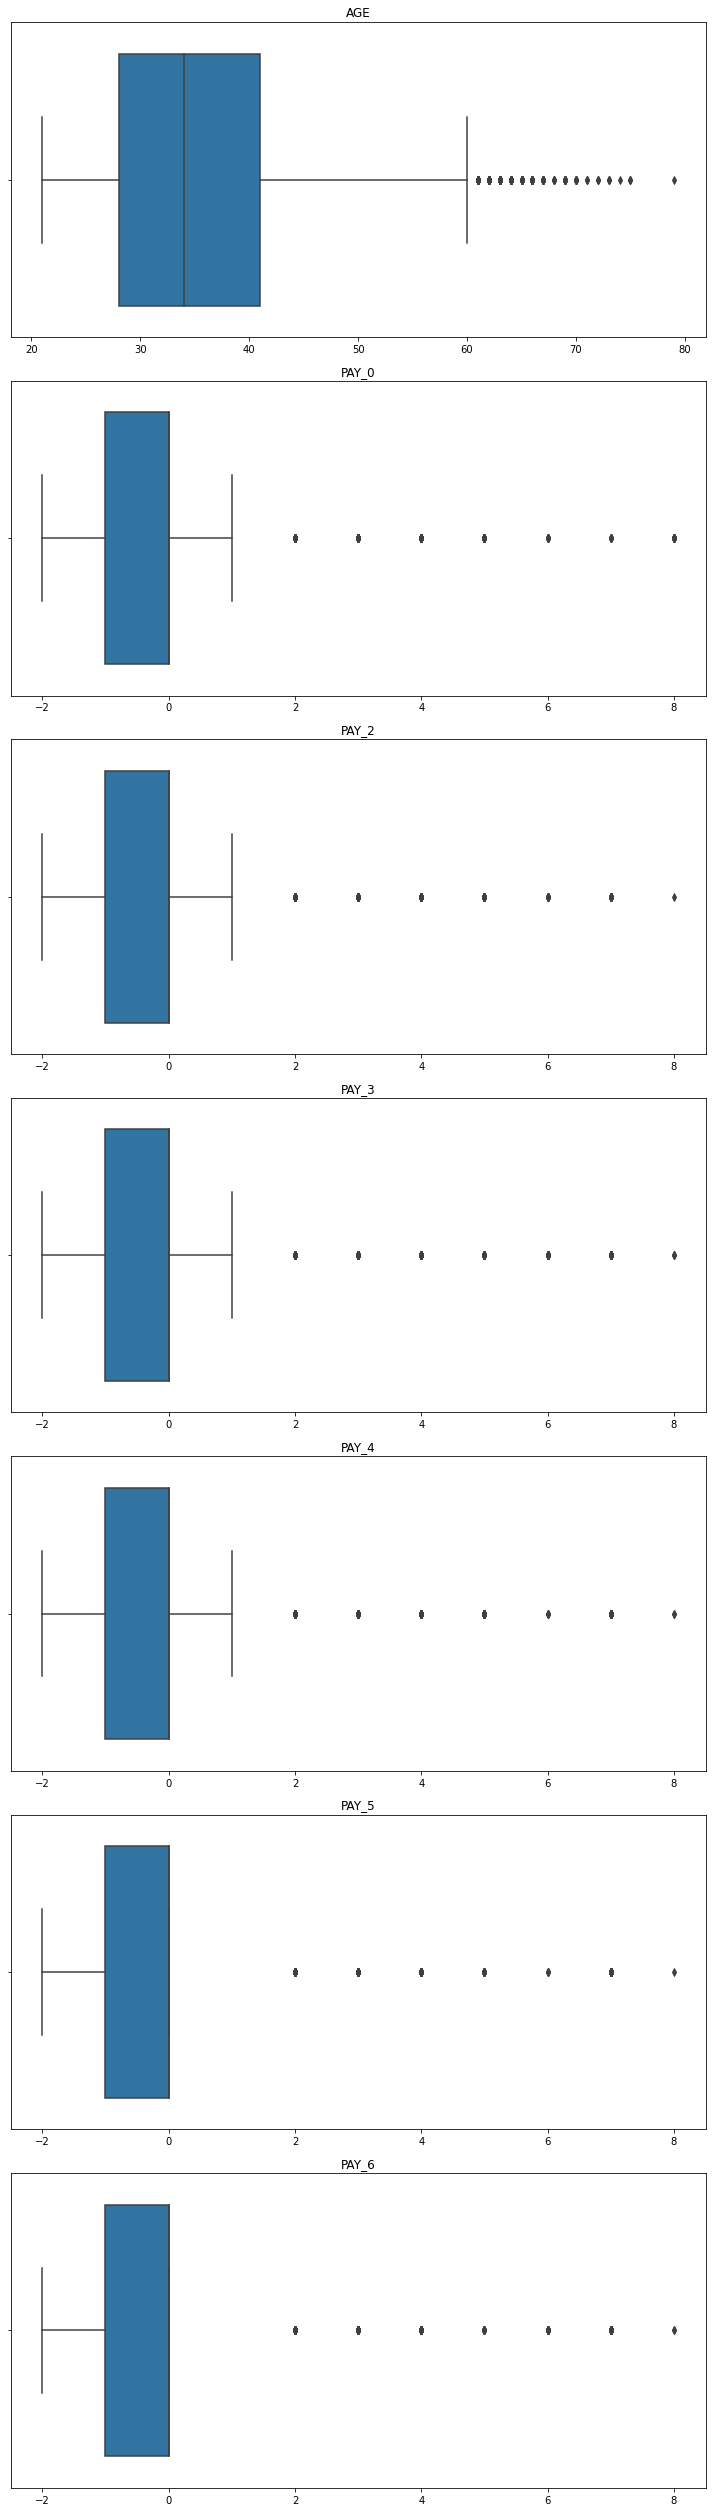

In [13]:
# Utilisation de Seaborn et Matplotlib pour créer une série de boîtes à moustaches (boxplots)
# pour visualiser la distribution des variables 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5' et 'PAY_6'. 

import seaborn as sns
import matplotlib.pyplot as plt

variables = ['AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Créeation d'une figure avec plusieurs sous-graphiques
fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(10, 5 * len(variables)))


for i, variable in enumerate(variables):
    sns.boxplot(x=df[variable], ax=axes[i])
    axes[i].set_title(variable)  
    axes[i].set_xlabel('')  
    axes[i].set_ylabel('')  

plt.tight_layout()
plt.show()


In [14]:
# Nous avons filtré le DataFrame "df" afin de ne conserver que les lignes où les valeurs 
# de plusieurs colonnes respectent nos conditions spécifiques. 
# La première porte sur l'âge, inférieur ou égal à 60 ans, ensuite 
# que les colonnes PAY_0 à PAY_6, où les valeurs doivent être inférieures ou égales à 2. 
# Enfin, nous avons également filtré les valeurs de la colonne 'LIMIT_BAL' 
# pour qu'elles soient inférieures ou égales à 600 000. 

df = df[(df['AGE']<=60) & (df['PAY_0']<=2) & (df['PAY_2']<=2) & (df['PAY_3']<=2) & (df['PAY_4']<=2) & (df['PAY_5']<=2) & (df['PAY_6']<=2) & (df['LIMIT_BAL']<=600000)]

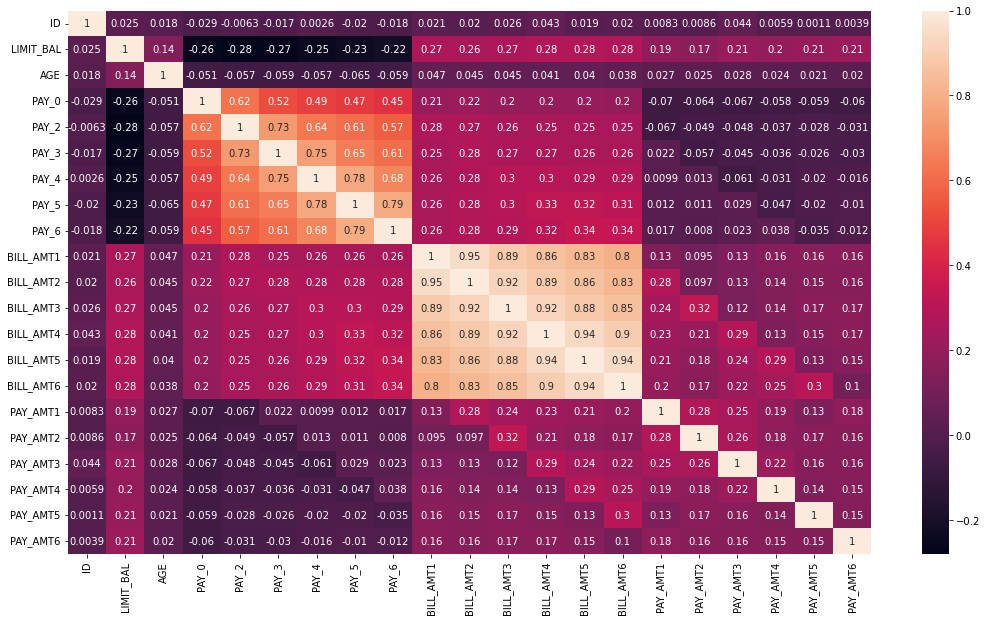

In [15]:
# Nous avons affiché une matrice de corrélation en calculant les corrélations 
# entre les différentes variables du DataFrame 

cor = df.corr()
cor
plt.figure(figsize=(18,10))


sns.heatmap(cor, annot=True)
plt.show()


In [16]:
# Sélection des colonnes numériques du DataFrame "df" et création d'un nouveau DataFrame
# que l'on a appelé "df_numeric", contenant uniquement ces colonnes. 

df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,26,-1,2,0,0,0,2,2682,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,34,0,0,0,0,0,0,29239,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,37,0,0,0,0,0,0,46990,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,57,-1,0,-1,0,0,0,8617,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,29995,80000,34,2,2,2,2,2,2,72557,...,79384,77519,82607,81158,7000,3500,0,7000,0,4000
29995,29996,220000,39,0,0,0,0,0,0,188948,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,29997,150000,43,-1,-1,-1,-1,0,0,1683,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29998,29999,80000,41,1,-1,0,0,0,-1,-1645,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [17]:
# Sélection des colonnes catégorielles, qu'il y ait des variables textuelles ou catégoriques
# du DataFrame "df" et création d'un nouveau DataFrame appelé "df_categorical" contenant uniquement ces colonnes.

df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,SEX,EDUCATION,default
0,F,University,Y
1,F,University,Y
2,F,University,N
3,F,University,N
4,M,University,N


In [18]:
# Création des variables indicatrices à partir des données catégorielles du DataFrame "df_categorical"

df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies

,SEX_M,EDUCATION_High School,EDUCATION_University,default _Y
0,0,0,1,1
1,0,0,1,1
2,0,0,1,0
3,0,0,1,0
4,1,0,1,0
...,...,...,...,...
29994,1,0,1,1
29995,1,1,0,0
29996,1,1,0,0
29998,1,1,0,1


In [19]:
# Fusion des DataFrames "df_numeric"  "df_dummies".

df = pd.concat([df_numeric, df_dummies], axis=1)

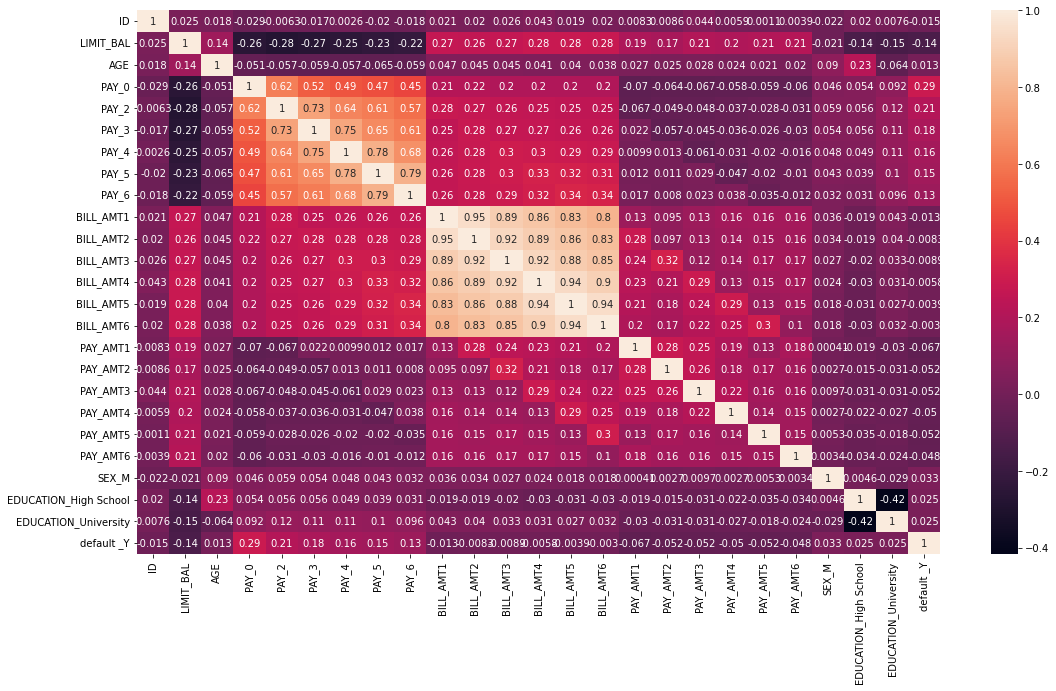

In [20]:
# Calcul de la matrice de corrélation pour toutes les variables du DataFrame "df" 
# et visualisation sous forme de carte thermique à l'aide de Seaborn et Matplotlib. 

cor = df.corr()
cor
plt.figure(figsize=(18,10))


sns.heatmap(cor, annot=True)
plt.show()


In [21]:
# Nous avons ensuite supprimé la colonne 'ID' du DataFrame 'df'.

df = df.drop(['ID'], axis=1)
df.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_M', 'EDUCATION_High School',
       'EDUCATION_University', 'default _Y'],
      dtype='object')

In [22]:
# Vérification des valeurs manquantes dans chaque colonne du DataFrame à la suite des diffèrentes manipulations.

df.isnull().sum()

LIMIT_BAL                0
AGE                      0
PAY_0                    0
PAY_2                    0
PAY_3                    0
PAY_4                    0
PAY_5                    0
PAY_6                    0
BILL_AMT1                0
BILL_AMT2                0
BILL_AMT3                0
BILL_AMT4                0
BILL_AMT5                0
BILL_AMT6                0
PAY_AMT1                 0
PAY_AMT2                 0
PAY_AMT3                 0
PAY_AMT4                 0
PAY_AMT5                 0
PAY_AMT6                 0
SEX_M                    0
EDUCATION_High School    0
EDUCATION_University     0
default _Y               0
dtype: int64

## Préparation des données en vue de l'implémentation des modèles d'apprentissage supervisé

In [23]:
# Après avoir supprimer la colonne 'default _Y', nous avons interpoler les valeurs manquantes,
# 'y' contient la variable cible à prédire.

X= df
y = X['default _Y']
X = X.drop(['default _Y'],axis =1)
X = X.fillna(X.interpolate())

In [24]:
# Standardisation des caractéristiques

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [25]:
# Division des données en ensembles d'entraînement et de test, 
# Nous avons spécifié que 33% des données seront utilisées comme ensemble de test, 
#  ainsi on aura 67% pour l'ensemble d'entraînement.
# Nous avons également fixé la graine aléatoire pour
# assurer la reproductibilité des résultats lors de la division aléatoire des données.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# Modèle CART

In [26]:
# Importation de packages gérant des classificateurs d'arbres de décision et permettant
# la validation croisée, sans oublier la recherche des hyperparamètres et 
# la division des données d'entraînement et de test


import warnings
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve


In [27]:
# Importation de classe nous permettant de créer un classificateur d'arbre de décision ainsi que 
# d'une fonction afin d'éffectuer une recherche exhaustive sur une grille de valeurs 
# pour des hyperparamètres donnés.


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Définition de la grille d'hyperparamètres
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.0, 0.01, 0.1, 0.5, 1.0, 2.0]
}

# Initialisation du modèle
dtree = DecisionTreeClassifier()

# Initialisation de  la recherche sur la grille avec la cross-valisation (cv=5 pour 5 plis)
grid_search = GridSearchCV(dtree, param_grid, cv=5)

# Adaptation du modèle aux données d'entraînement
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres
best_params = grid_search.best_params_
print("Meilleurs paramètres:", best_params)

# Modèle avec les meilleurs paramètres
best_dtree = grid_search.best_estimator_

KeyboardInterrupt: 

In [ ]:
# Utilisation du modèle avec l'élagage basé sur la complexité de coût (ccp_alpha)

# Remplacement de ccp_alpha par la meilleure valeur trouvée dans les meilleurs paramètres

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=best_params['max_depth'], 
                                    min_samples_split=best_params['min_samples_split'],
                                    min_samples_leaf=best_params['min_samples_leaf'],
                                    ccp_alpha=best_params['ccp_alpha'])

# Fit du modèle avec élagage basé sur la complexité de coût
clf_gini.fit(X_train, y_train)


In [ ]:
# Utilisation du modèle d'arbre de décision pour effectuer des prédictions sur l'ensemble de test 

y_pred_gini = clf_gini.predict(X_test)

In [28]:
# évaluation de la précision du modèle d'arbre de décision entraîné avec le critère de Gini.

from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8218


In [29]:
# Utilisation du modèle d'abre de décision pour effectuer des prédictions sur l'ensemble d'entrainement.

y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 1, 0, ..., 0, 0, 0], dtype=uint8)

In [30]:
# Affichage du Score de précision de l'ensemble d'entraînement :

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8313


In [31]:
# Affichage des scores sur l'ensemble d'entraînement et de test

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8313
Test set score: 0.8218


[Text(0.5, 0.9, 'X[2] <= 1.5\ngini = 0.329\nsamples = 18766\nvalue = [14875, 3891]'),
 Text(0.25, 0.7, 'X[2] <= 0.5\ngini = 0.271\nsamples = 17195\nvalue = [14422, 2773]'),
 Text(0.125, 0.5, 'X[15] <= 1654.5\ngini = 0.234\nsamples = 14915\nvalue = [12894, 2021]'),
 Text(0.0625, 0.3, 'X[6] <= 1.0\ngini = 0.308\nsamples = 5456\nvalue = [4419, 1037]'),
 Text(0.03125, 0.1, 'gini = 0.296\nsamples = 5235\nvalue = [4288, 947]'),
 Text(0.09375, 0.1, 'gini = 0.483\nsamples = 221\nvalue = [131, 90]'),
 Text(0.1875, 0.3, 'X[5] <= 1.0\ngini = 0.186\nsamples = 9459\nvalue = [8475, 984]'),
 Text(0.15625, 0.1, 'gini = 0.174\nsamples = 8957\nvalue = [8096, 861]'),
 Text(0.21875, 0.1, 'gini = 0.37\nsamples = 502\nvalue = [379, 123]'),
 Text(0.375, 0.5, 'X[5] <= 0.5\ngini = 0.442\nsamples = 2280\nvalue = [1528, 752]'),
 Text(0.3125, 0.3, 'X[0] <= 125000.0\ngini = 0.413\nsamples = 1871\nvalue = [1326, 545]'),
 Text(0.28125, 0.1, 'gini = 0.452\nsamples = 862\nvalue = [564, 298]'),
 Text(0.34375, 0.1, 'gin

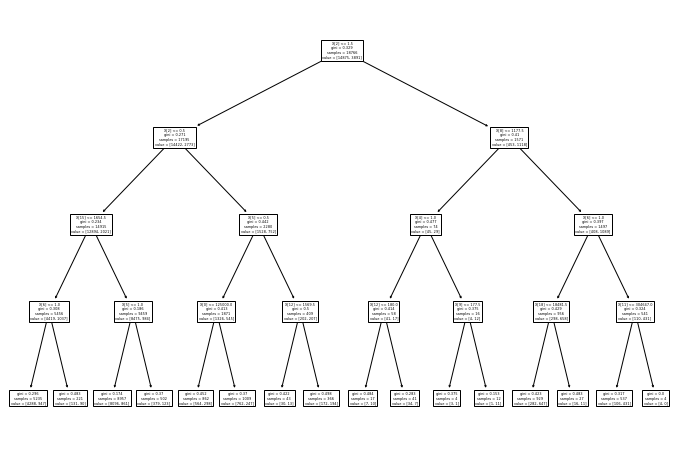

In [32]:
# Affichage de l'arbre de décision entraîné avec le critère Gini

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

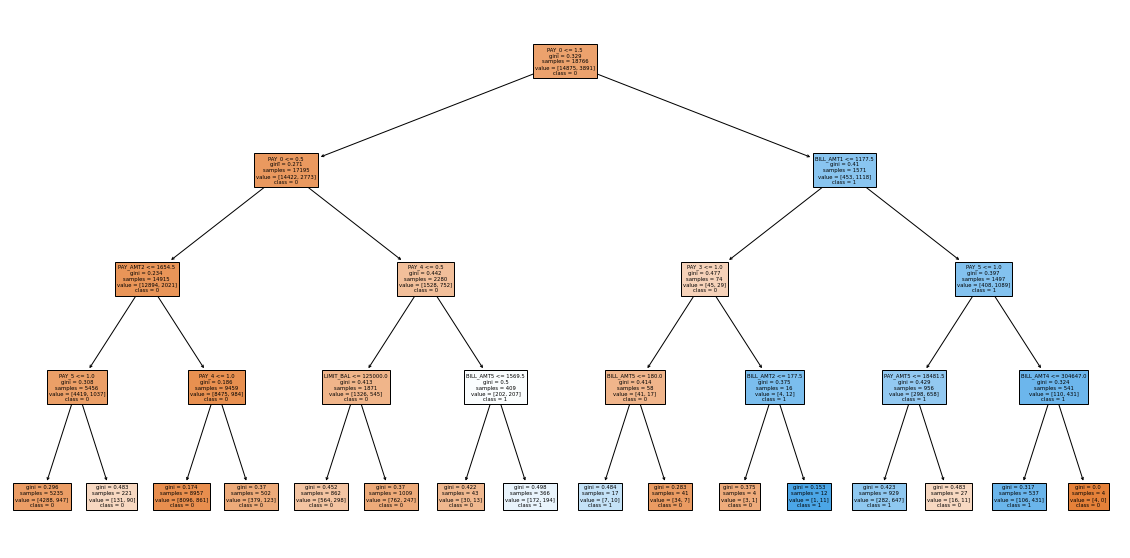

In [33]:
# Affichage de l'arbre de décision entraîné avec le critère Gini avec les classes d'appartenance 
# pour chaque feuille

from sklearn.tree import plot_tree

plt.rcParams["figure.figsize"] = (20, 10)
plt.figure()
plot_tree(clf_gini, filled=True, feature_names=X_train.columns, class_names=["0", "1"])
plt.show()


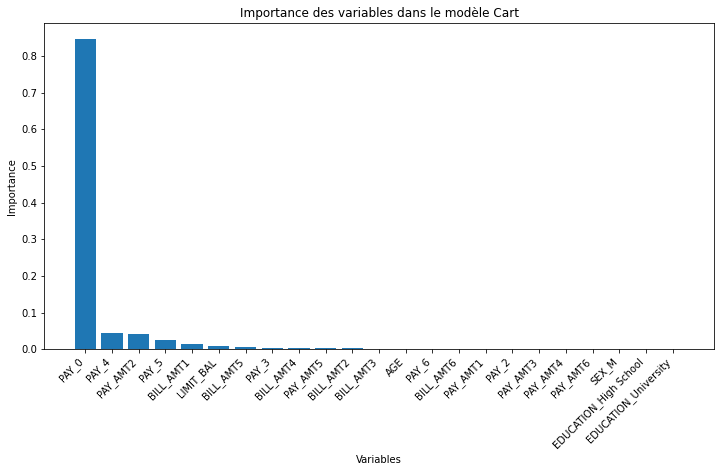

In [63]:

feature_importances = clf_gini.feature_importances_

# Créeation d'un DataFrame pour visualiser l'importance des variables
importances_df = pd.DataFrame({'Variable': X_train.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Création d'un histogramme des importances des variables
plt.figure(figsize=(12, 6))
plt.bar(importances_df['Variable'], importances_df['Importance'])
plt.xlabel('Variables')
plt.ylabel('Importance')
plt.title('Importance des variables dans le modèle Cart')
plt.xticks(rotation=45, ha='right')
plt.show()


In [34]:
# évaluation détaillée des performances du modèle d'arbre de décision entraîné
# sur l'ensemble de test

y_predict_out = clf_gini.predict(X_test)

cross_tab_out = pd.crosstab(y_test,y_predict_out).values

TN = cross_tab_out[0,0]  #Vrais Negatifs
FN = cross_tab_out[0,1]  #Faux Negatifs
FP = cross_tab_out[1,0]  #Faux Positifs
TP = cross_tab_out[1,1]  #Vrais Positifs



print('Global accuracy out sample : ',accuracy_score(y_test,y_predict_out))
print('Out-sample sensitivity out sample ',round(TP/(TP+FN)*100,2),'%')
print('Out-sample PPV out sample : ',round(TP/(TP+FP)*100,2),'%')


pd.crosstab(y_test,y_predict_out)

Global accuracy out sample :  0.8218111002921129
Out-sample sensitivity out sample  63.2 %
Out-sample PPV out sample :  30.56 %


col_0,0,1
default _Y,,
0,7019,336
1,1311,577


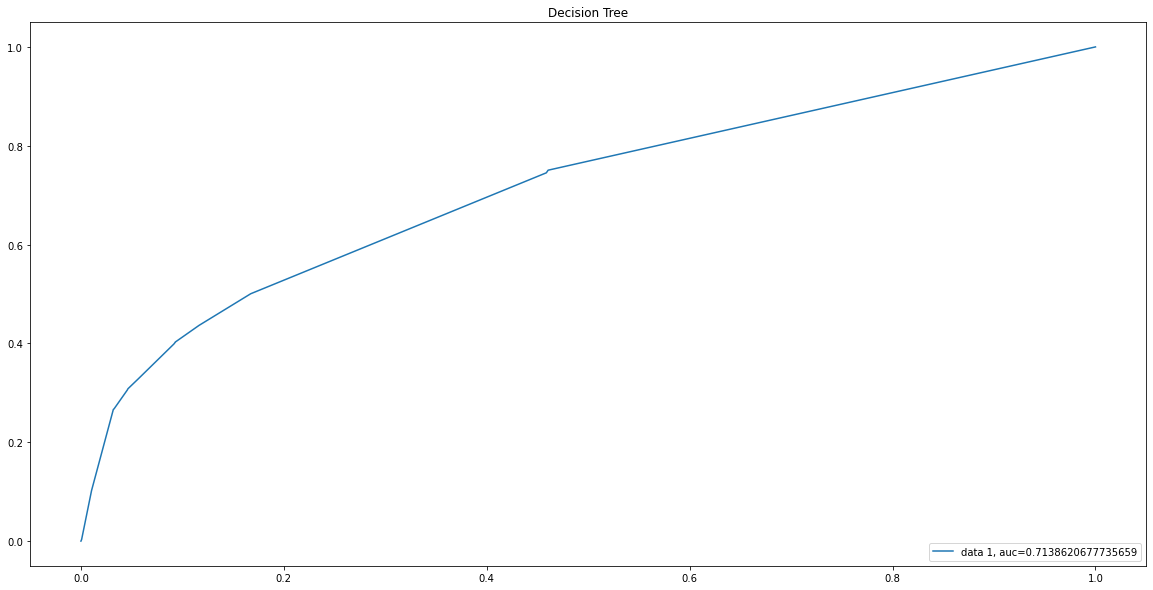

In [35]:
# Affichage de la courbe ROC

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_preds_proba_dt = clf_gini.predict_proba(X_test)[::,1]
y_pred_proba = y_preds_proba_dt
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title('Decision Tree')
plt.legend(loc=4)
plt.show()

# Modèle Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

# Créeation du modèle RandomForest
rf_model = RandomForestClassifier(random_state=42)

# Définition de la grille des hyperparamètres à rechercher
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [0,2,4,6,8, 10,],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Utilisation de la validation croisée avec Grid Search pour rechercher les meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring=make_scorer(accuracy_score), cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Affichage des meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres:", grid_search.best_params_)

# Créeation du modèle RandomForest avec les meilleurs hyperparamètres
best_rf_model = grid_search.best_estimator_

# Prédictions sur l'ensemble de test
y_pred = best_rf_model.predict(X_test)

# Évalueation les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision sur l'ensemble de test:", accuracy)


Meilleurs hyperparamètres: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Précision sur l'ensemble de test: 0.8227848101265823


In [37]:
# Sélection du meilleur modèle de forêt aléatoire trouvé lors de la recherche par grille.

best_rf_model = grid_search.best_estimator_

# Prédictions sur l'ensemble de test
y_pred = best_rf_model.predict(X_test)

# Évaluation les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision sur l'ensemble de test:", accuracy)


Précision sur l'ensemble de test: 0.8227848101265823


In [38]:

y_predict_out = best_rf_model.predict(X_test)


cross_tab_out = pd.crosstab(y_test,y_predict_out).values

TN = cross_tab_out[0,0]  #Vrais Négatifs
FN = cross_tab_out[0,1]  #Faux Négatifs
FP = cross_tab_out[1,0]  #Faux Positifs
TP = cross_tab_out[1,1]  #Vrais Positifs



print('Global accuracy out sample : ',accuracy_score(y_test,y_predict_out))
print('Out-sample sensitivity out sample ',round(TP/(TP+FN)*100,2),'%')
print('Out-sample PPV out sample : ',round(TP/(TP+FP)*100,2),'%')


pd.crosstab(y_test,y_predict_out)

Global accuracy out sample :  0.8227848101265823
Out-sample sensitivity out sample  64.67 %
Out-sample PPV out sample :  29.18 %


col_0,0,1
default _Y,,
0,7054,301
1,1337,551


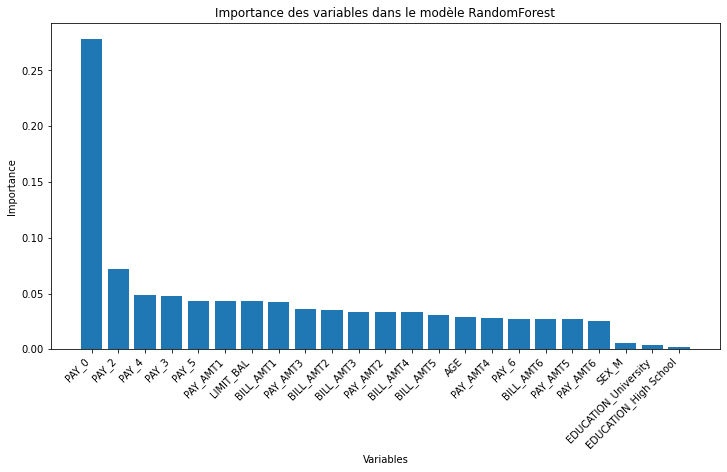

In [39]:
import matplotlib.pyplot as plt

# Entraînement du modèle RandomForest avec les meilleurs hyperparamètres
best_rf_model = RandomForestClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    random_state=42
)
best_rf_model.fit(X_train, y_train)

# Obtention de l'importance des variables
feature_importances = best_rf_model.feature_importances_

# Créeation d'un DataFrame pour visualiser l'importance des variables
importances_df = pd.DataFrame({'Variable': X_train.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Création d'un histogramme des importances des variables
plt.figure(figsize=(12, 6))
plt.bar(importances_df['Variable'], importances_df['Importance'])
plt.xlabel('Variables')
plt.ylabel('Importance')
plt.title('Importance des variables dans le modèle RandomForest')
plt.xticks(rotation=45, ha='right')
plt.show()



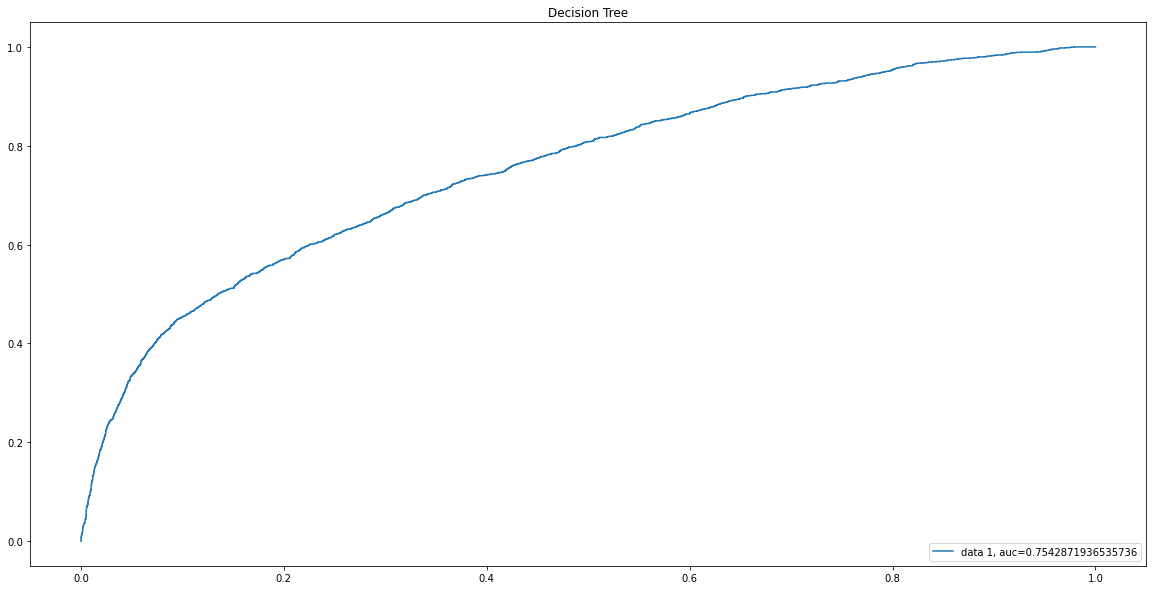

In [40]:
# Affichage de la courbe ROC

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_preds_proba_dt = best_rf_model.predict_proba(X_test)[::,1]
y_pred_proba = y_preds_proba_dt
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title('Decision Tree')
plt.legend(loc=4)
plt.show()

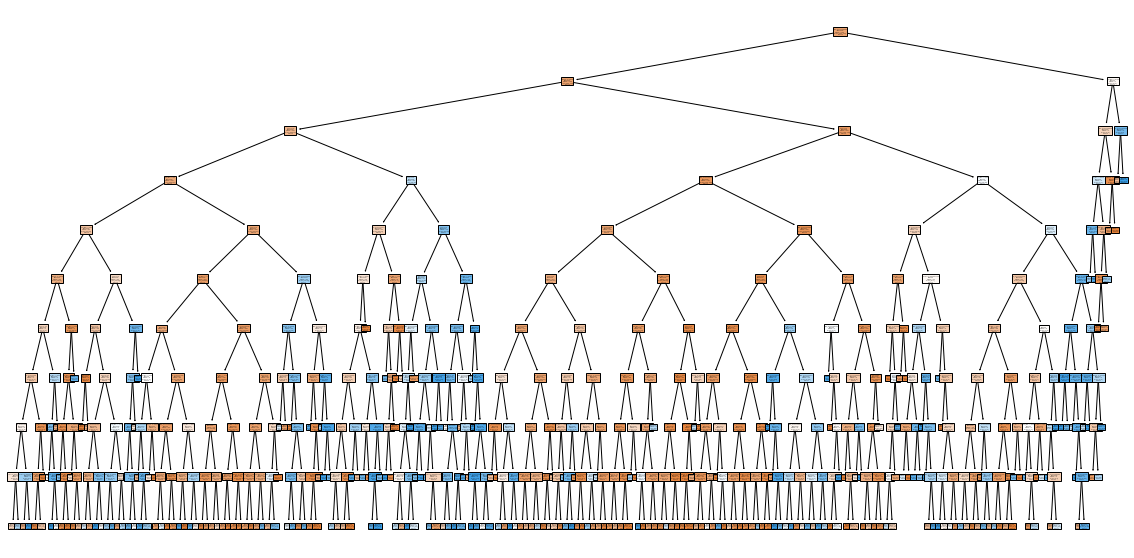

In [65]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Extraction d'un arbre individuel du modèle RandomForest (par exemple, le premier arbre)
tree_estimator = best_rf_model.estimators_[0]

# Configuration de la taille de la figure
plt.rcParams["figure.figsize"] = (20, 10)

# Affichage de l'arbre
plt.figure()
plot_tree(tree_estimator, filled=True, feature_names=X_train.columns, class_names=["0", "1"])
plt.show()


## Modèle XG Boost

In [42]:
# Paramètrage du modèle eXtreme Gradient Boost

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(objective='binary:logistic')
parm_xgb = {'max_depth': [3, 4, 6, 8], 'n_estimators': [250, 300, 400], 'learning_rate':[0.01, 0.05, 0.1]}
grid_xgb = GridSearchCV(estimator=xgb, param_grid=parm_xgb , scoring='accuracy', cv = 5, n_jobs=-1, verbose=3)
grid_result =grid_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [43]:
# Calcul du meilleur score xg boost

optimized_xgb = grid_xgb.best_estimator_
grid_xgb.best_score_

0.8293723607510725

In [44]:
# Meilleurs paramèetres 

grid_xgb.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}

In [45]:
# Entrainements sur les échantillons d'entrainement et de test

xgb_train_pred = optimized_xgb.predict(X_train)
xgb_test_pred = optimized_xgb.predict(X_test)

In [47]:
# Affichage des diverses précisions

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


print("The accuracy on train data is ", accuracy_score(xgb_train_pred, y_train))
print("The accuracy on test data is ", accuracy_score(xgb_test_pred, y_test))
print("The precision on test data is ", precision_score(xgb_test_pred, y_test))
print("The recall on test data is ", recall_score(xgb_test_pred, y_test))
print("The f1 on test data is ", f1_score(xgb_test_pred, y_test))


The accuracy on train data is  0.8307044655227539
The accuracy on test data is  0.8242994698690901
The precision on test data is  0.2934322033898305
The recall on test data is  0.6563981042654028
The f1 on test data is  0.4055636896046852


In [48]:
y_predict_out = xgb_test_pred

cross_tab_out = pd.crosstab(y_test,y_predict_out).values

TN = cross_tab_out[0,0]  #Vrais Négatifs
FN = cross_tab_out[0,1]  #Faux Négatifs
FP = cross_tab_out[1,0]  #Faux Positifs
TP = cross_tab_out[1,1]  #Vrais Positifs



print('Global accuracy out sample : ',accuracy_score(y_test,y_predict_out))
print('Out-sample sensitivity out sample ',round(TP/(TP+FN)*100,2),'%')
print('Out-sample PPV out sample : ',round(TP/(TP+FP)*100,2),'%')


pd.crosstab(y_test,y_predict_out)

Global accuracy out sample :  0.8242994698690901
Out-sample sensitivity out sample  65.64 %
Out-sample PPV out sample :  29.34 %


col_0,0,1
default _Y,,
0,7065,290
1,1334,554


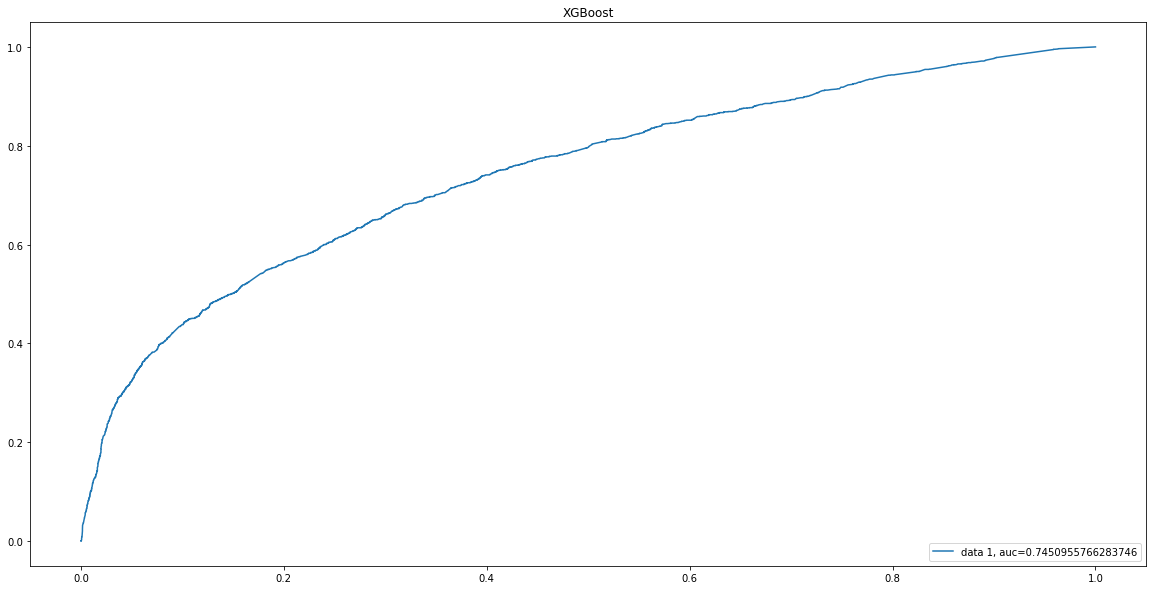

In [49]:
# Affichage de la courbe ROC

y_preds_proba_xgb = optimized_xgb.predict_proba(X_test)[::,1]
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title('XGBoost')
plt.legend(loc=4)
plt.show()